# PyMC Linear Regression Demo

This notebook fits a simple Bayesian linear regression using PyMC on synthetic data.

In [1]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

/Users/rjljr/devel/pyuv/.venv/lib/python3.12/site-packages/arviz/__init__.py:50: FutureWarning: 
ArviZ is undergoing a major refactor to improve flexibility and extensibility while maintaining a user-friendly interface.
Some upcoming changes may be backward incompatible.
For details and migration guidance, visit: https://python.arviz.org/en/latest/user_guide/migration_guide.html
  warn(


In [2]:
rng = np.random.default_rng(42)
N = 50
x = rng.uniform(0.0, 1.0, size=N)
y = 1.0 + 2.0 * x + rng.normal(0.0, 0.3, size=N)

In [3]:
with pm.Model() as model:
    alpha = pm.Normal("alpha", mu=0.0, sigma=5.0)
    beta = pm.Normal("beta", mu=0.0, sigma=5.0)
    sigma = pm.HalfNormal("sigma", sigma=1.0)
    mu = alpha + beta * x
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

In [4]:
with model:
    idata = pm.sample()
    

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


In [5]:
az.summary(idata, var_names=["alpha", "beta", "sigma"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.933,0.075,0.785,1.069,0.002,0.001,1789.0,1985.0,1.0
beta,2.031,0.124,1.806,2.271,0.003,0.002,1782.0,1782.0,1.0
sigma,0.239,0.025,0.194,0.285,0.001,0.000,2196.0,2032.0,1.0


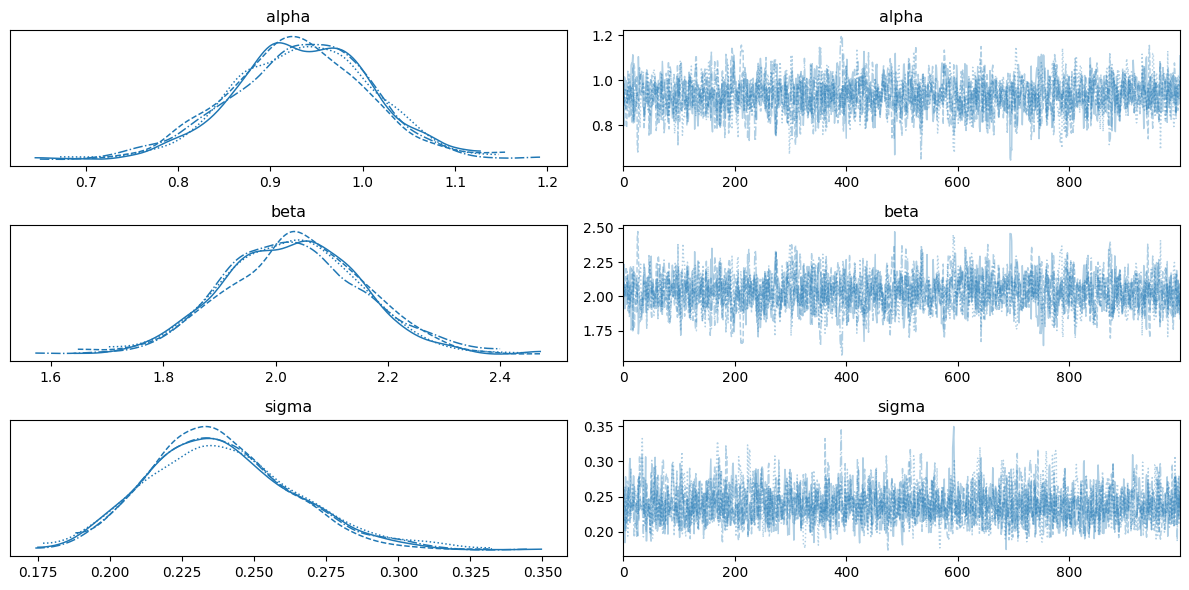

In [6]:
az.plot_trace(idata, var_names=["alpha", "beta", "sigma"])
plt.tight_layout()

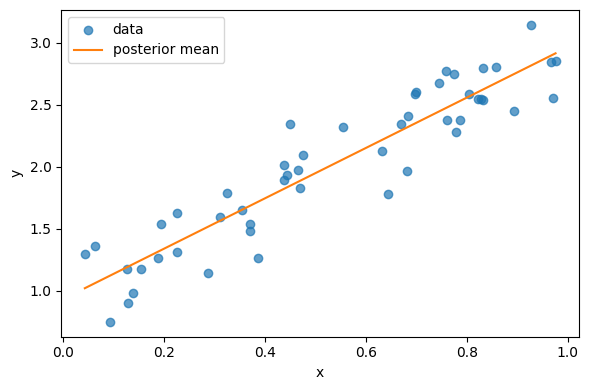

In [7]:
alpha_mean = idata.posterior["alpha"].mean().item()
beta_mean = idata.posterior["beta"].mean().item()
x_grid = np.linspace(x.min(), x.max(), 100)
y_line = alpha_mean + beta_mean * x_grid

plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, label="data")
plt.plot(x_grid, y_line, color="C1", label="posterior mean")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()